In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True
import os

In [4]:
inlet_x=-0.5
outlet_x=1.1

# Load data

In [5]:
cd ~/HPT_1M/DOM30_LS05_TI5/convergence/

/mnt/drive1/inlet_turb_sweep_Re1M/DOM30_LS05_TI5/convergence


In [6]:
cases=[]
labels=[]
convergencedir='./'
# now find all the stat-files and set the labels
dt=2.3*1.0e-05
root, dirs, files=next(os.walk(convergencedir))
for d in dirs:
#                self.filelist.append(os.getcwd()+'/'+convergencedir+'/'+d+'/STAT_cont.bin')
    cases.append(convergencedir+'/'+d+'/')
    temp=d.split('_')
    labels.append('%.2f - %.2f'%(float(temp[0])*dt,float(temp[2])*dt))
n_c=len(cases)
print cases
print labels

['.//4754880_to_4804880/', './/4479880_to_4704880/']
['109.36 - 110.51', '103.04 - 108.21']


In [7]:
cascades=[]
for i in range(n_c):
    filen=cases[i]+'/STAT_cont'
    cascades.append(l.cascade_mean(inlet_x,outlet_x,filename=filen,infile='../NEW_vki.in',Refplane='Outlet',chord=1.74
                                  ,HeatTransfer=True,label=labels[i].replace('_',' ')))

reading inlet and outlet
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
198
reading blade
Reading file in CGNS format
extract line from (i,j) 448 1  to  448 1760  in block  4 1760
reading data from file previously extracted
3 i= 448
Reading file in CGNS format
extract line from (i,j) 448 1  to  448 480  in block  3 480
reading data from file previously extracted
5 i= 448
Reading file in CGNS format
extract line from (i,j) 448 1  to  448 1760  in block  5 1760
reading data from file previously extracted
7 i= 448
Reading file in CGNS format
extract line from (i,j) 448 1  to  448 800  in block  7 800
reading data from file previously extracted
finished reading blade


/home/rp3e11/platus/lines.py:1429: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.tang!=None:
/home/rp3e11/platus/lines.py:1432: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.plus_coords!=None:
/home/rp3e11/platus/lines.py:1434: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.cf!=None:
/home/rp3e11/platus/lines.py:1436: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.dist!=None:
/home/rp3e11/platus/lines.py:2754: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.blade.dist!=None:
/home/rp3e11/platus/lines.py:1569: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.len_el==None:


len=1.57396069169
len=1.57396068424
dTdn [-198.39270963 -206.21412087 -215.01854431 -224.51720453 -234.46178895]
mu [  5.67779489e-06   5.67779489e-06   5.67779489e-06   5.67779489e-06
   5.67779489e-06]
Reading file in CGNS format
extract line from (i,j) 1 1  to  1 1760  in block  4 1760
reading data from file previously extracted
Reading file in CGNS format
extract line from (i,j) 447 1  to  447 1760  in block  4 1760
reading data from file previously extracted
Reading file in CGNS format
extract line from (i,j) 446 1  to  446 1760  in block  4 1760
reading data from file previously extracted
Reading file in CGNS format
extract line from (i,j) 448 1  to  448 1760  in block  4 1760
reading data from file previously extracted
Reading file in CGNS format
extract line from (i,j) 1 1  to  1 480  in block  3 480
reading data from file previously extracted
Reading file in CGNS format
extract line from (i,j) 447 1  to  447 480  in block  3 480
reading data from file previously extracted
Read

In [11]:
cascades[1].report_integral_mixed_out()

Isentropic Reynolds Number:   1076543.49760
Isentropic Mach Number:    0.9176650378
Isentropic Reynolds Number:   1093113.52017 (inlet mass averaged)
Isentropic Mach Number:    0.9176672705 (inlet mass averaged)
Isentropic exit Velocity:    5.6363548793
Mixed out loss    0.0362159708
Inlet angle:    0.0941631392
Inlet Mach number:    0.1486163905
Inlet stagnation pressure:   33.0001007661
Inlet stagnation Temperature:    1.8184563540
Inlet static pressure:   32.4949236142
Inlet static Temperature:    1.8104588939
Outlet angle:  -74.9916230169
Outlet Mach number:    0.9036473202
Outlet stagnation pressure:   32.4981030965
Outlet stagnation Temperature:    1.8103241251
Outlet static pressure:   19.1388771543
Outlet static Temperature:    1.5561761365
Outlet density:    0.6887248631


# Plot cascae quantities

## Inlet profiles

In [ ]:
ids=[]
ids.append(cascades[0].header.get_index(101,2))
ids.append(cascades[0].header.get_index(101,3))
ids.append(cascades[0].header.get_index(101,10))
ids.append(cascades[0].header.get_index(101,5))
for i,val in enumerate(ids):
    plt.figure()
    for j in range(n_c):
        plt.plot(cascades[j].inlet.data[:,val],cascades[j].inlet.data[:,1],label=cascades[j].label)
    plt.legend()
    plt.xlabel(cascades[j].header.vars[val])

In [11]:
inlet_stream=l.lines(convergence=True,convergencedir='./')

In [12]:
inlet_stream.extr_line([-1.0,0.0],[-0.2,0.0],300)

IOError: [Errno 2] No such file or directory: './/4509880_to_4659880/STAT_cont.bin'

In [13]:
pl_var=[]
pl_var.append(inlet_stream.l[0].var.get_index(101,10))
pl_var.append(inlet_stream.l[0].var.get_index(101,2))
inlet_stream.plot_var([0],pl_var)

AttributeError: 'NoneType' object has no attribute 'get_index'

# Blade Profiles

<IPython.core.display.Javascript object>


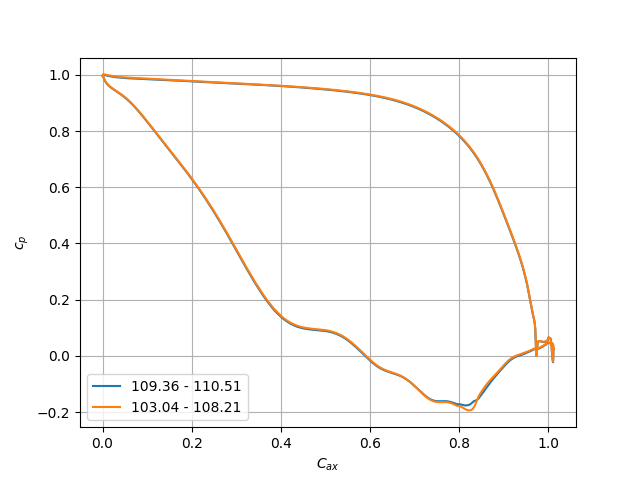

In [9]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.data[:,0],cascades[i].cp,label=cascades[i].label)
plt.grid()
plt.legend()
plt.xlabel('$C_{ax}$')
plt.ylabel('$c_p$')

<IPython.core.display.Javascript object>


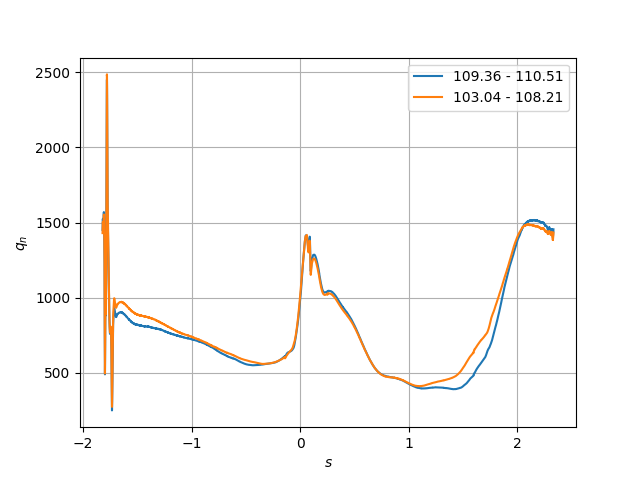

In [10]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.dist[:],cascades[i].qnorm2,label=cascades[i].label)
plt.grid()
plt.legend()
plt.xlabel('$s$')
plt.ylabel('$q_{n}$')

## Outlet region

<IPython.core.display.Javascript object>


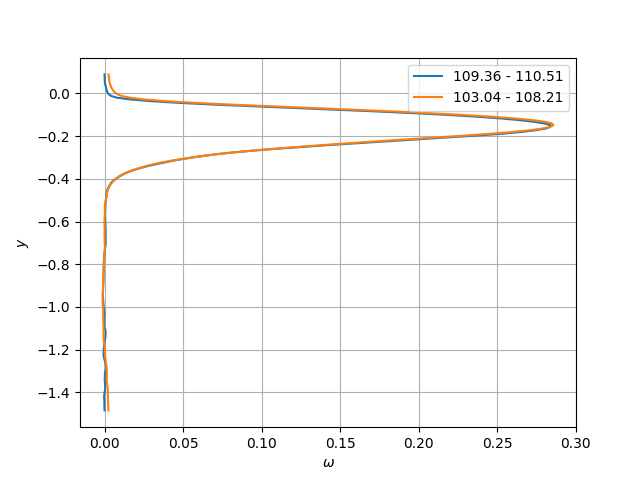

In [11]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].loss_mix[:],cascades[i].outlet.data[:,1],label=cascades[i].label)
plt.grid()
plt.legend(loc=0)
plt.xlabel('$\omega$')
plt.ylabel('$y$')